## 5. Feature Engineering and Modeling

### 5.1 Data Import

In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
import warnings

In [2]:
# Set max colums display to see all the columns
pd.options.display.max_columns = 80

In [3]:
# Import and take a look at train_df
df = pd.read_csv("../data/train_filtered_1.csv")
df.head()

,resale_price,price_per_sqft,floor_area_sqft,planning_area,city_distance,lease_commence_date,tranc_year,mid_storey,max_floor_lvl,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,mall_nearest_distance,mall_within_1km,hawker_nearest_distance,hawker_within_1km,mrt_interchange,mrt_nearest_distance,bus_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation,flat_type
0,680000.0,701.928238,968.760,Kallang,4.223704,2006,2016,11,25,0,0,0,0,142,1094.090418,0.0,154.753357,3.0,0,330.083069,0,29.427395,1138.633422,78,1,1138.633422,224,0,4 ROOM
1,665000.0,475.230826,1399.320,Bishan,7.027402,1987,2012,8,9,0,0,0,0,112,866.941448,1.0,640.151925,1.0,1,903.659703,1,58.207761,415.607357,45,1,447.894399,232,0,5 ROOM
2,838000.0,540.639580,1550.016,Bukit Batok,12.149659,1997,2013,14,16,0,0,0,0,90,1459.579948,0.0,1762.082341,0.0,0,1334.251197,1,214.747860,498.849039,39,0,180.074558,188,0,EXECUTIVE
3,550000.0,496.080066,1108.692,Bishan,8.391652,1992,2012,3,11,1,0,0,0,75,950.175199,1.0,726.215262,1.0,1,907.453484,1,43.396521,389.515528,20,1,389.515528,253,1,4 ROOM
4,298000.0,333.552717,893.412,Yishun,14.753850,1987,2017,2,4,0,0,0,0,48,729.771895,1.0,1540.151439,0.0,0,412.343032,0,129.422752,401.200584,74,0,312.025435,208,0,4 ROOM


### 5.2 Additional Features Engineering

In [4]:
# Create age when the unit was sold
df["sold_age"] = df["tranc_year"] - df["lease_commence_date"]
df[["sold_age", "tranc_year", "lease_commence_date"]].head()

,sold_age,tranc_year,lease_commence_date
0,10,2016,2006
1,25,2012,1987
2,16,2013,1997
3,20,2012,1992
4,30,2017,1987


In [5]:
# THIS IS FOR STREAMLIT APPS
# Drop others
use_col = ['resale_price', 'planning_area', 'floor_area_sqft', 
          'flat_type', 'sold_age', 
          'mrt_nearest_distance', 'bus_stop_nearest_distance',
          'mall_nearest_distance', 'hawker_nearest_distance',
          'pri_sch_nearest_distance', 'sec_sch_nearest_dist' 
          ]

df = df[use_col]

In [6]:
X = df.iloc[:,1:]
X.head()

,planning_area,floor_area_sqft,flat_type,sold_age,mrt_nearest_distance,bus_stop_nearest_distance,mall_nearest_distance,hawker_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist
0,Kallang,968.760,4 ROOM,10,330.083069,29.427395,1094.090418,154.753357,1138.633422,1138.633422
1,Bishan,1399.320,5 ROOM,25,903.659703,58.207761,866.941448,640.151925,415.607357,447.894399
2,Bukit Batok,1550.016,EXECUTIVE,16,1334.251197,214.747860,1459.579948,1762.082341,498.849039,180.074558
3,Bishan,1108.692,4 ROOM,20,907.453484,43.396521,950.175199,726.215262,389.515528,389.515528
4,Yishun,893.412,4 ROOM,30,412.343032,129.422752,729.771895,1540.151439,401.200584,312.025435


In [7]:
y = df.iloc[:,:1]
y.head()

,resale_price
0,680000.0
1,665000.0
2,838000.0
3,550000.0
4,298000.0


### 5.2 Preprocessing

In [8]:
X.head()

,planning_area,floor_area_sqft,flat_type,sold_age,mrt_nearest_distance,bus_stop_nearest_distance,mall_nearest_distance,hawker_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist
0,Kallang,968.760,4 ROOM,10,330.083069,29.427395,1094.090418,154.753357,1138.633422,1138.633422
1,Bishan,1399.320,5 ROOM,25,903.659703,58.207761,866.941448,640.151925,415.607357,447.894399
2,Bukit Batok,1550.016,EXECUTIVE,16,1334.251197,214.747860,1459.579948,1762.082341,498.849039,180.074558
3,Bishan,1108.692,4 ROOM,20,907.453484,43.396521,950.175199,726.215262,389.515528,389.515528
4,Yishun,893.412,4 ROOM,30,412.343032,129.422752,729.771895,1540.151439,401.200584,312.025435


In [9]:
# flat_type dummies
flat_type_dum = pd.get_dummies(X["flat_type"])
flat_type_dum = flat_type_dum.astype(int)
flat_type_dum.head()

,1 ROOM,2 ROOM,3 ROOM,4 ROOM,5 ROOM,EXECUTIVE,MULTI-GENERATION
0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [10]:
# planning_area dummies
planning_area_dum = pd.get_dummies(X["planning_area"])
planning_area_dum = planning_area_dum.astype(int)
planning_area_dum.head()

,Ang Mo Kio,Bedok,Bishan,Bukit Batok,Bukit Merah,Bukit Panjang,Bukit Timah,Changi,Choa Chu Kang,Clementi,Downtown Core,Geylang,Hougang,Jurong East,Jurong West,Kallang,Marine Parade,Novena,Outram,Pasir Ris,Punggol,Queenstown,Rochor,Sembawang,Sengkang,Serangoon,Tampines,Tanglin,Toa Payoh,Western Water Catchment,Woodlands,Yishun
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [11]:
# Drop original features
X = X.drop(columns=["planning_area","flat_type"])
X.head()

,floor_area_sqft,sold_age,mrt_nearest_distance,bus_stop_nearest_distance,mall_nearest_distance,hawker_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist
0,968.760,10,330.083069,29.427395,1094.090418,154.753357,1138.633422,1138.633422
1,1399.320,25,903.659703,58.207761,866.941448,640.151925,415.607357,447.894399
2,1550.016,16,1334.251197,214.747860,1459.579948,1762.082341,498.849039,180.074558
3,1108.692,20,907.453484,43.396521,950.175199,726.215262,389.515528,389.515528
4,893.412,30,412.343032,129.422752,729.771895,1540.151439,401.200584,312.025435


In [12]:
# Combine OHE
X = pd.concat([X,flat_type_dum,planning_area_dum],axis=1)
X.head()

,floor_area_sqft,sold_age,mrt_nearest_distance,bus_stop_nearest_distance,mall_nearest_distance,hawker_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,1 ROOM,2 ROOM,3 ROOM,4 ROOM,5 ROOM,EXECUTIVE,MULTI-GENERATION,Ang Mo Kio,Bedok,Bishan,Bukit Batok,Bukit Merah,Bukit Panjang,Bukit Timah,Changi,Choa Chu Kang,Clementi,Downtown Core,Geylang,Hougang,Jurong East,Jurong West,Kallang,Marine Parade,Novena,Outram,Pasir Ris,Punggol,Queenstown,Rochor,Sembawang,Sengkang,Serangoon,Tampines,Tanglin,Toa Payoh,Western Water Catchment,Woodlands,Yishun
0,968.760,10,330.083069,29.427395,1094.090418,154.753357,1138.633422,1138.633422,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1399.320,25,903.659703,58.207761,866.941448,640.151925,415.607357,447.894399,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1550.016,16,1334.251197,214.747860,1459.579948,1762.082341,498.849039,180.074558,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1108.692,20,907.453484,43.396521,950.175199,726.215262,389.515528,389.515528,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,893.412,30,412.343032,129.422752,729.771895,1540.151439,401.200584,312.025435,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### 5.3 Model

In [13]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
# Linear regression cross val
lr = LinearRegression()
lr_scores = cross_val_score(lr,X_train,y_train,cv=3)
lr_scores.mean()

0.8336484060578803

In [15]:
# Ridge cross val
ridge = Ridge()
ridge_scores = cross_val_score(ridge,X_train,y_train,cv=3)
ridge_scores.mean()

0.8336447987757664

In [16]:
# Lasso cross val
lasso = Lasso()
lasso_scores = cross_val_score(lasso,X_train,y_train,cv=3)
lasso_scores.mean()

C:\Users\MichaelKS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.419e+13, tolerance: 1.556e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\MichaelKS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.418e+13, tolerance: 1.540e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\MichaelKS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.442e+

0.8336474490984497

### Linear Regression

In [17]:
# Use Linear Regression because we got the highest R2 score.
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

print(f"Trainig R2: {r2_train}")
print(f"Test R2: {r2_test}")

Trainig R2: 0.8338405343373163
Test R2: 0.832584731505666


In [18]:
# MSE 
metrics.mean_squared_error(y_test, y_test_pred)

3411383314.5088625

In [19]:
# RMSE
metrics.mean_squared_error(y_test, y_test_pred, squared=False)

58407.048500235505

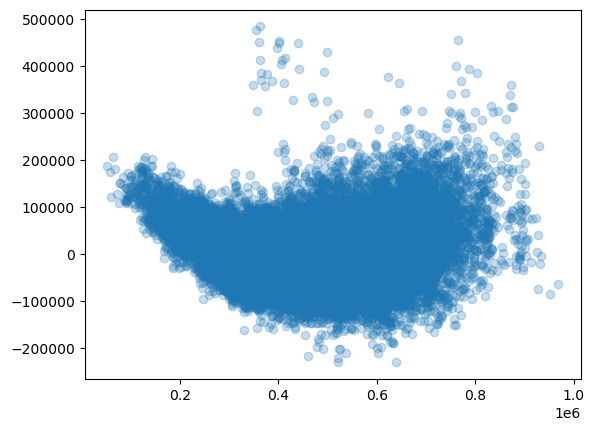

In [20]:
# Plot pred with residuals
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha = 0.25)

In [21]:
# # Create age when the unit was sold
# X_test["sold_age"] = X_test["tranc_year"] - X_test["lease_commence_date"]
# X_test[["sold_age", "tranc_year", "lease_commence_date"]].head()

# # Drop tranc_year, lease_commence_date
# X_test = X_test.drop(columns=["tranc_year", "lease_commence_date"])
# X_test.head()

In [22]:
# # Drop price_per_sqft
# X_test = X_test.drop(columns="price_per_sqft")
# X_test.head()